In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import math
import os

import sys
sys.path.append('../')
import plotting_functions as pf
import model_utils as mu
import data_utils as du

In [2]:
dim_input = 4 # Input dimension = `label_tensor.size(1)`
dim_context = 3
dim_features_per_context = int(2**(math.log(dim_input,2)+1) - 1)
batch_size = dim_input * dim_context

In [3]:
# network
n_hidden_layers = 1
gate_output = False

# data
symmetric_contexts = True
separate_contexts = True
append = True
random = False

held_out = []  # samples held out from training

In [4]:
plot_specs = {'save': True,
              'show': False,
              'anim': True,
              'save_dir': './figures/'}

plot_specs['save_dir'] += 'inp' + str(dim_input) + '_c' + str(dim_context)
plot_specs['save_dir'] += '_sym/' if symmetric_contexts else '_asym/'

if not os.path.exists(plot_specs['save_dir']) and plot_specs['save']:
    print('making directory: ', plot_specs['save_dir'])
    os.makedirs(plot_specs['save_dir'])

making directory:  ./figures/inp4_c3_sym/


# Get data

### Dataset

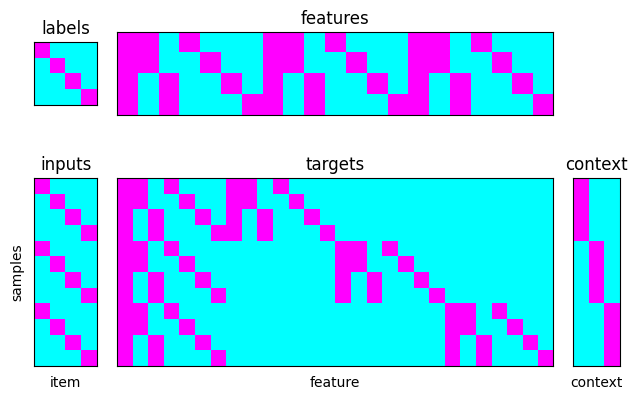

In [5]:
tree_labels, tree_features_all = du.hsd_context(n_items=dim_input, n_contexts=dim_context, 
                                                symmetry=symmetric_contexts, random=random)

label_tensor, feature_tensor, context_tensor = du.get_batch(tree_labels, tree_features_all, dim_context, 
                                                            separation=separate_contexts)

# feature_tensor = torch.zeros_like(feature_tensor)
# feature_tensor[:,:3] = 1
# for i, row in enumerate(feature_tensor):
#     feature_tensor[i,:] = row[torch.randperm(row.size()[0])]
# feature_tensor = (torch.FloatTensor(feature_tensor.shape).uniform_() > 0.5).float()

if append:
    appendable = torch.split(torch.Tensor(tree_features_all), dim_features_per_context, dim=1)
    appendable = torch.cat(appendable, dim=0)
    feature_tensor = torch.cat((appendable, feature_tensor), dim=1)

pf.plot_inputs_targets_contexts(label_tensor, feature_tensor, context_tensor, held_out, labels=tree_labels, 
                                features=tree_features_all, plot_specs=plot_specs)

### sigma x

check diagonalisable

torch.Size([28, 7])
torch.Size([7, 7])


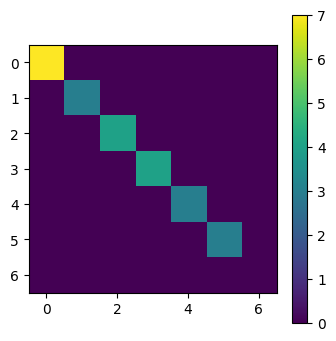

In [6]:
x_ = torch.cat([context_tensor, label_tensor], dim=1)
# x_ = label_tensor

sigma = feature_tensor.T @ x_
print(sigma.shape)
U, S, V = torch.svd(sigma)

sigma_xx = x_.T @ x_
print(sigma_xx.shape)

diag = V.T @ sigma_xx @ V

plt.figure(figsize=(4,4))
im = plt.imshow(diag.numpy())
plt.colorbar(im)

# Gated network

### Get pathway structure

Mapping is list of lists. i-th list contains the pathways that are active for i-th context

In [7]:
import itertools as it

from GLNNet import GLNNet, train

cat = False
if cat:
    label_tensor_ = torch.cat((context_tensor, label_tensor), dim=1)
else:
    label_tensor_ = label_tensor
dim_input_gated = label_tensor_.shape[1]
dim_input_relu = label_tensor.shape[1]

dim_hidden = 20  # Hidden neurons
dim_output = feature_tensor.shape[1] #dim_features_per_context * dim_context if separate_contexts else dim_features_per_context

mapping, n_pathways = mu.get_mappings(dim_context)
pathways = (1,n_pathways,1)
# mapping = [[0,1,2],[0,1,3],[0,2,3]]
# pathways = (1,4,1)
dims_gated = (dim_input_gated, dim_hidden*n_pathways, dim_output)
dims_relu = (dim_input_relu, dim_hidden*n_pathways, dim_output)

# pathways = (1, dim_context+1, 1)
# dims_gated = (dim_input_gated, dim_hidden, dim_output)
# dims_relu = (dim_input_relu, dim_hidden, dim_output)

gateable_layers = [1]
# mainlist = [1,2,3]
# mapping = [[0] + list(comb) for comb in it.combinations(mainlist, 2)] 

print('mapping:\t', mapping)

mapping:	 [[0, 1, 2, 4], [0, 1, 3, 5], [0, 2, 3, 6]]


In [8]:
cat = True

### Train gated network

In [9]:
# Training
lr = .005 # Learning rate
gamma = 1e-12 * 10**7 if len(pathways) > 3 else 1e-12
n_epochs = 20000

In [10]:
ctx_to_all = False  # determines whether only shared pathway receives context input, or all

multi_pathway_model = GLNNet(dims=dims_gated, pathways=pathways, context_to_pathway_map=mapping, 
                             n_context=dim_context, context_in_input=True, ctx_to_all=ctx_to_all)

SEED = 2021
mu.set_seed(seed=SEED)

mu.initializer_(multi_pathway_model, gamma)

losses_gated, preds_gated, rsms_gated, pathway_preds_gated, svds, weights_gated = train(multi_pathway_model,
                  label_tensor_,
                  feature_tensor,
                  context_tensor,
                  n_epochs=n_epochs,
                  lr=lr,
                  hold_out_i=held_out,
                  corr=False,
                  rsm_interval=n_epochs//100)

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

### Final gated network weights

N.B. svds ordered by magnitude not order of learning

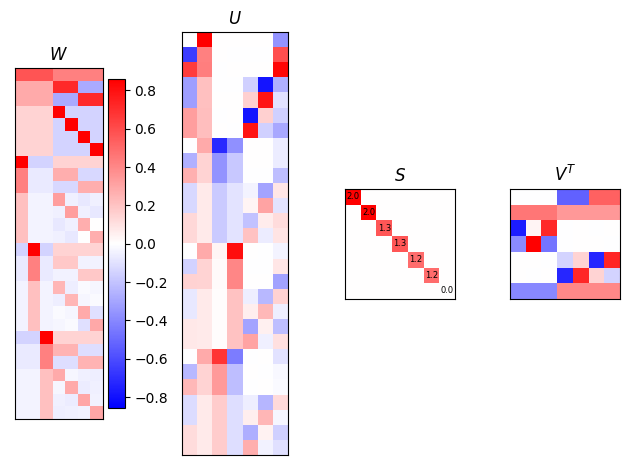

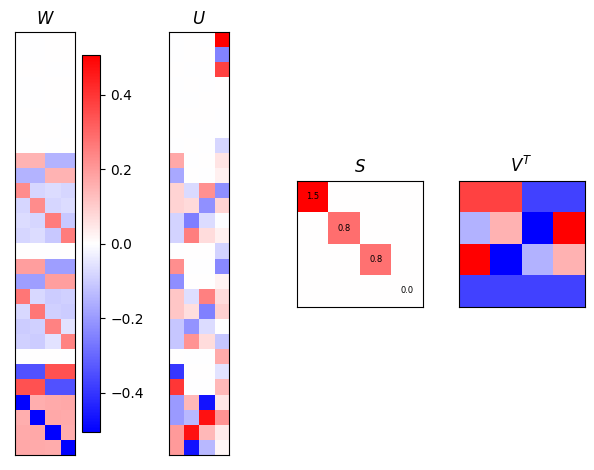

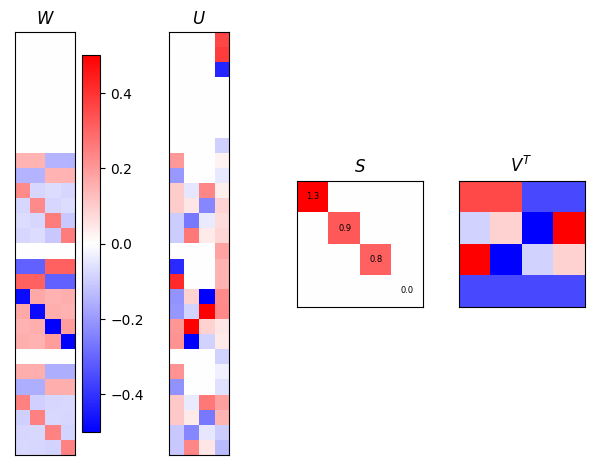

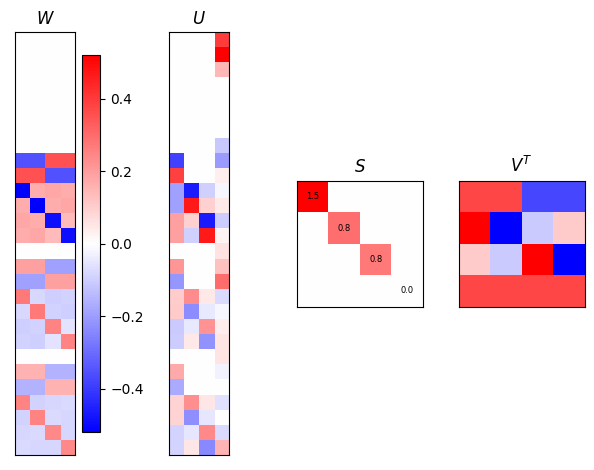

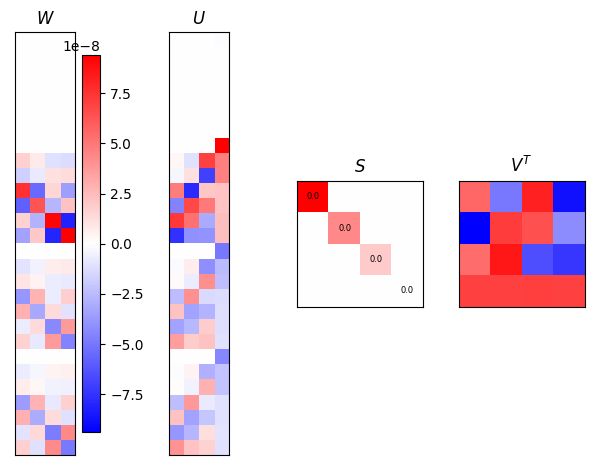

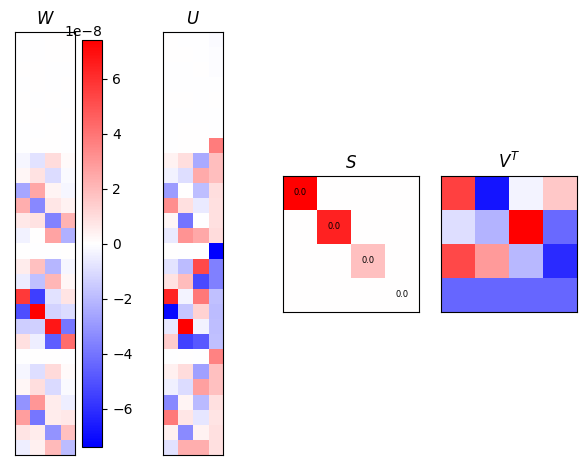

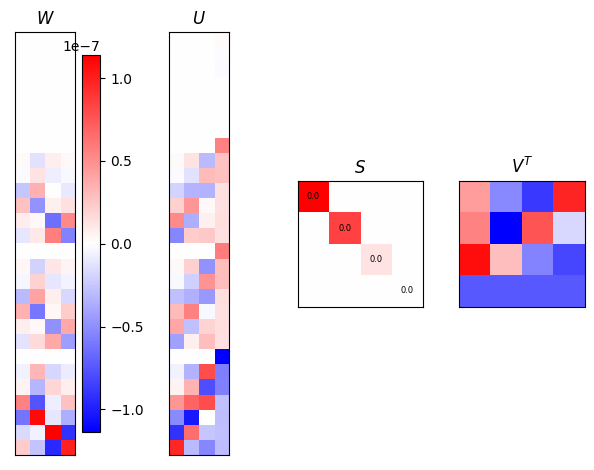

In [11]:
svds_final_transpose = [[svds[0][i][-1,:,:], svds[1][i][-1,:], svds[2][i][-1,:,:]] for i in range(len(svds[0]))]
weights_final = [w[-1,:,:] for w in weights_gated]

pf.plot_pathway_weights(weights_final, svds_final_transpose, plot_specs)

### Pathway preds animation

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways


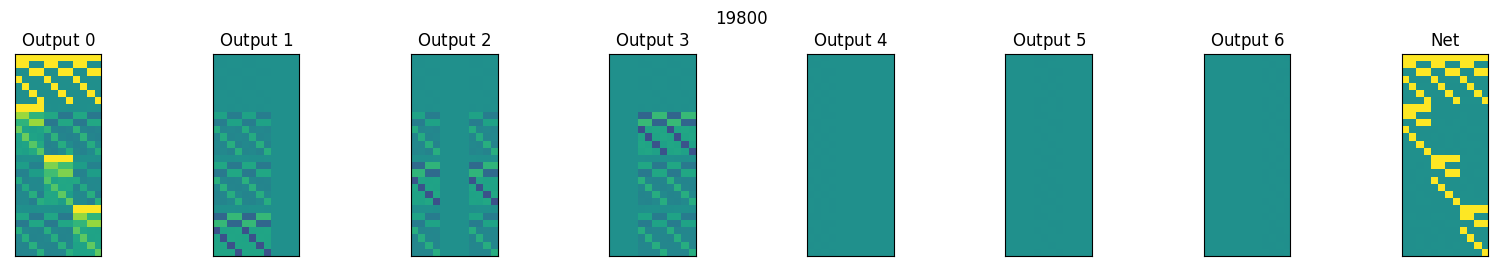

In [12]:
if plot_specs['anim']:
    plt.rcParams['animation.ffmpeg_path'] = '/Users/jo/miniforge3/envs/gated/bin/ffmpeg'
    pathway_preds = multi_pathway_model.compute_pathway_preds(label_tensor_, context_tensor)
    pathway_preds_np = pathway_preds.detach().numpy()

#     additional_data = {'weights': weights_gated, 'U': svds[0], 'S':svds[1], 'V':svds[2]}
    additional_data = {}

    pf.animate_pathway_preds(pathway_preds_gated, dim_context, additional_data_dict=additional_data,
                             plot_specs=plot_specs, data_interval=n_epochs//100, hor=True)

## ReLU net

In [13]:
from ReluNNet import ReluNNet
relunn_model = ReluNNet(dims=dims_relu, n_context=dim_context, gateable_layers=gateable_layers, final_relu=False)

7


In [14]:
print(dims_relu)
print(dims_gated)

(4, 140, 28)
(4, 140, 28)


### Train ReLU net 

In [15]:
SEED = 2021
mu.set_seed(seed=SEED)

mu.initializer_(relunn_model, gamma)

losses_relu, preds_relu, rsms_relu, _, svds_relu, weights_relu = train(relunn_model,
                  label_tensor,
                  feature_tensor,
                  context_tensor,
                  n_epochs=n_epochs,
                  lr=lr,
                  hold_out_i=held_out,
                  corr=False,
                  rsm_interval=n_epochs//100,
                  relu=True)

[97, 11, 10, 15, 2, 2, 3]
[140, 0, 0, 0, 0, 0, 0]
[140, 0, 0, 0, 0, 0, 0]
[140, 0, 0, 0, 0, 0, 0]
[140, 0, 0, 0, 0, 0, 0]
[140, 0, 0, 0, 0, 0, 0]
[117, 5, 10, 7, 0, 1, 0]
[116, 6, 10, 8, 0, 0, 0]
[111, 9, 12, 8, 0, 0, 0]
[109, 9, 13, 9, 0, 0, 0]
[103, 12, 16, 9, 0, 0, 0]
[99, 13, 18, 10, 0, 0, 0]
[96, 11, 18, 12, 0, 3, 0]
[95, 10, 19, 13, 0, 3, 0]
[91, 12, 20, 14, 0, 3, 0]
[89, 12, 22, 17, 0, 0, 0]
[88, 12, 22, 18, 0, 0, 0]
[88, 12, 22, 18, 0, 0, 0]
[88, 12, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]
[89, 11, 22, 18, 0, 0, 0]


In [16]:
# # svds_relu[1]
# # plt.figure()
# # for s in svds_relu[1]:
# #     plt.plot(s, 'r')

# idxs = [3]
# colors = ['k','b','c','m', 'g', 'y', 'r']
# for i, p in enumerate(svds_relu[1]):
#     if i in idxs:
#         for s in p.T:
#             plt.plot(s, c=colors[i], linewidth=1, linestyle='--')
    
# colors = ['k','b','c','m']
# for i, p in enumerate(svds[1]):
#     if i in idxs:
#         for s in p.T:
#             plt.plot(s, c=colors[i], linewidth=1)
    
# plt.show()

### Pathway preds ReLU (not implemented)

In [17]:
# if plot_specs['anim']:
#     pf.animate_preds(preds_relu, n_epochs, separate_contexts, dim_context, duration=10,
#                      fps=10, plot_specs=None, name='preds_anim')

# ReLU vs Gated

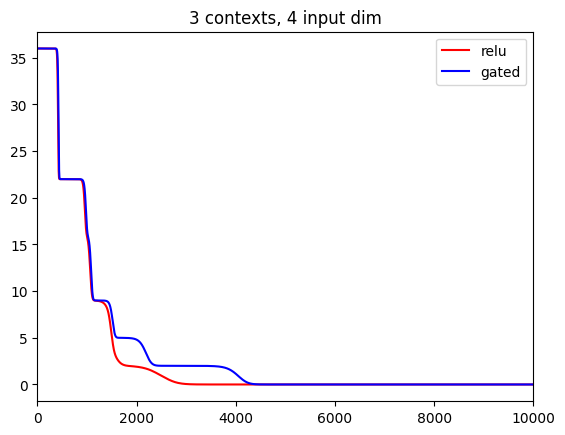

In [18]:
fig = plt.figure()
plt.plot(losses_relu, 'r', label='relu')
plt.plot(losses_gated, 'b', label='gated')
plt.legend()
plt.xlim([0,10000])
title = str(dim_context) + ' contexts, ' + str(dim_input) + ' input dim'
plt.title(title)
plt.show()

if plot_specs is not None and plot_specs['save'] is True:
    fig.savefig(plot_specs['save_dir'] + 'loss' + '.png', format='png')

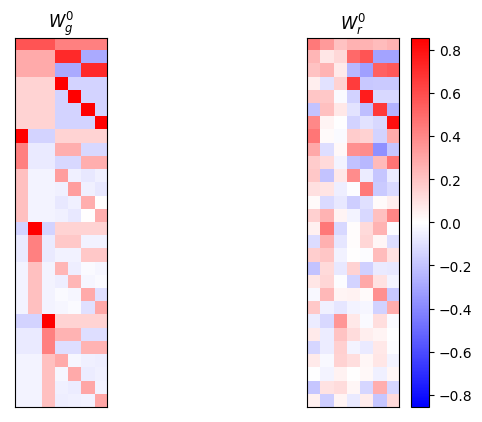

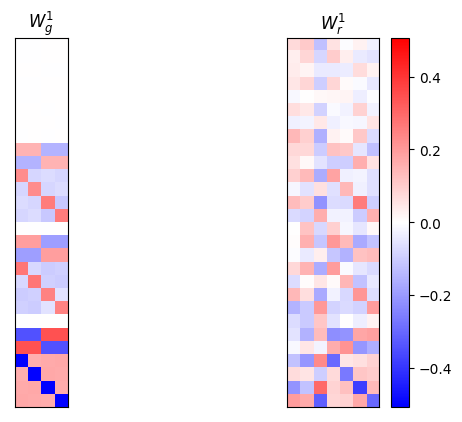

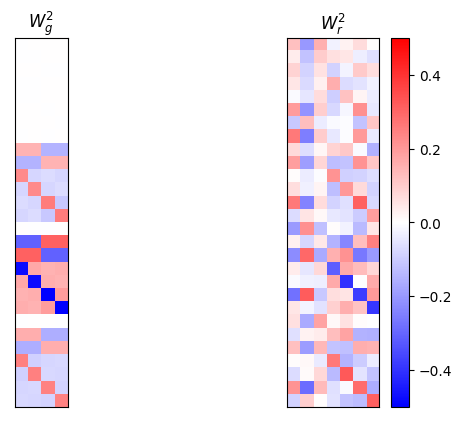

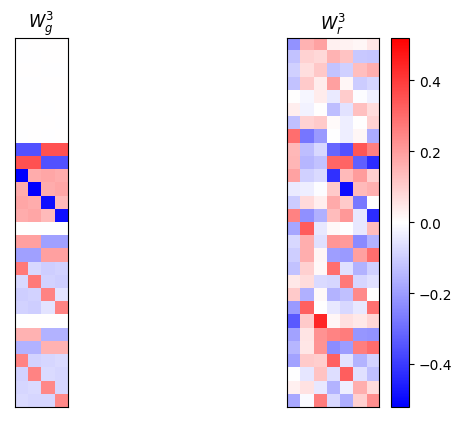

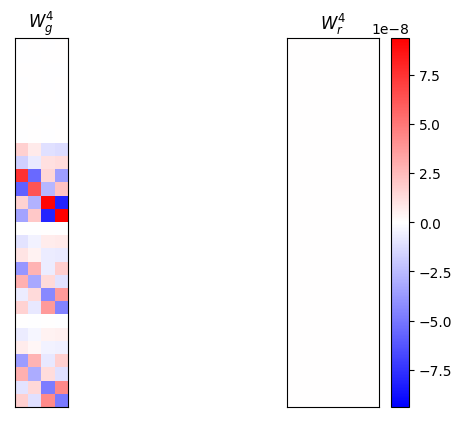

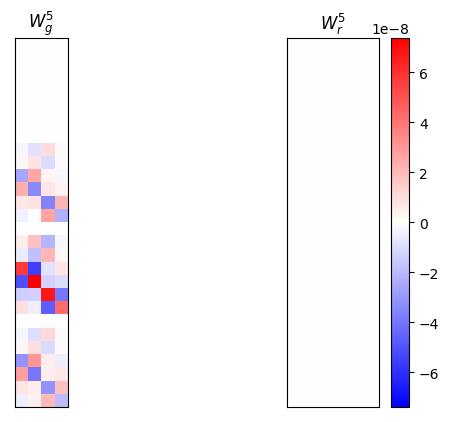

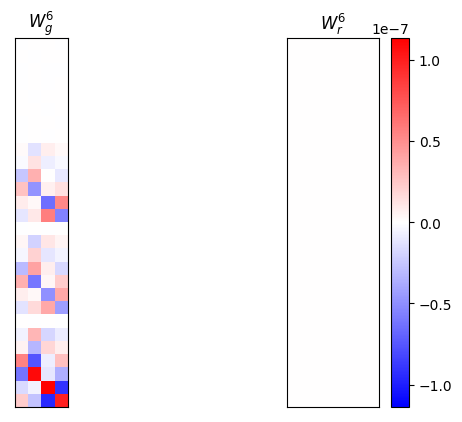

In [19]:
# _, weights_gated_t = multi_pathway_model.get_svds()
plot_svd = False
_, acts, _ = relunn_model.forward(label_tensor, context_tensor)
comb_idxs, all_combs = relunn_model.get_neuron_gatings(acts)
svd_relu, weights_relu = relunn_model.get_svds(comb_idxs)

for i, (w_g, w_r) in enumerate(zip(weights_gated, weights_relu)):
    fig, axes = plt.subplots(1,2)
    if type(w_g) != np.ndarray:
        w_g = w_g.detach().numpy()
    if type(w_r) != np.ndarray:
        w_r = w_r.detach().numpy()
    if len(w_g.shape) != 2:
        w_g = w_g[-1,:,:]
#         w_r = w_r[-1,:,:]

    lim_g = np.maximum(np.abs(np.min(w_g)), np.max(w_g))
    lim_r = np.maximum(np.abs(np.min(w_r)), np.max(w_r))
    lim = np.maximum(lim_g, lim_r)
    axes[0].imshow(w_g, vmin=-lim, vmax=lim, cmap='bwr')
    axes[0].xaxis.set_visible(False)
    axes[0].yaxis.set_visible(False)
    axes[0].title.set_text(r'$W_g^{}$'.format(i))

    im=axes[1].imshow(w_r, vmin=-lim, vmax=lim, cmap='bwr')
    axes[1].xaxis.set_visible(False)
    axes[1].yaxis.set_visible(False)
    axes[1].title.set_text(r'$W_r^{}$'.format(i))
    plt.colorbar(im)
    if plot_svd:
        pf.show_svd(torch.Tensor(w_g), lim)
        pf.show_svd(torch.Tensor(w_r), lim)
        
    if plot_specs is not None and plot_specs['save'] is True:
        fig.savefig(plot_specs['save_dir'] + 'weights_relu_gated_' + str(i) + '.png', format='png')

tensor([-0.4364, -0.4364, -0.4364, -0.3273, -0.3273, -0.3273, -0.3273])
both
tensor([ 1.2471e-09,  1.8666e-07, -8.5866e-08,  5.0000e-01,  5.0000e-01,
        -5.0000e-01, -5.0000e-01])
x
tensor([ 1.4902e-08, -7.0711e-01,  7.0711e-01, -7.7987e-08,  1.1424e-07,
        -2.0174e-07, -2.6323e-08])
c
tensor([-8.1650e-01,  4.0825e-01,  4.0825e-01, -1.1106e-07, -1.0824e-07,
        -8.6066e-08, -9.6626e-08])
c
tensor([-1.5165e-08,  0.0000e+00, -4.2839e-08, -5.9823e-01,  5.9823e-01,
        -3.7699e-01,  3.7699e-01])
x
tensor([-1.3397e-08, -1.1921e-07, -9.3560e-08,  3.7699e-01, -3.7699e-01,
        -5.9823e-01,  5.9823e-01])
x
tensor([ 0.0000e+00,  0.0000e+00,  1.3037e-07,  5.0000e-01,  5.0000e-01,
        -5.0000e-01, -5.0000e-01])
x
tensor([-3.4244e-08,  0.0000e+00, -7.7993e-08, -5.0000e-01, -5.0000e-01,
         5.0000e-01,  5.0000e-01])
x
tensor([-5.4829e-08,  1.7881e-07,  0.0000e+00, -5.0000e-01, -5.0000e-01,
         5.0000e-01,  5.0000e-01])
x
tensor([ 0.0000e+00, -4.6566e-09, -1.1032e-

tensor([ 6.9755e-08, -8.9407e-08,  5.9605e-08, -1.4522e-01,  1.4508e-01,
        -6.9198e-01,  6.9212e-01])
x
tensor([ 0.0000e+00,  1.5344e-07,  3.8851e-07, -5.0000e-01, -5.0000e-01,
         5.0000e-01,  5.0000e-01])
x
tensor([-3.1382e-07,  0.0000e+00,  2.2618e-07,  5.0000e-01,  5.0000e-01,
        -5.0000e-01, -5.0000e-01])
x
tensor([-4.2546e-07, -1.1325e-06, -5.9605e-08, -6.9205e-01,  6.9205e-01,
         1.4515e-01, -1.4515e-01])
both
tensor([ 0.0000e+00,  1.3696e-06,  2.9711e-07, -6.9206e-01,  6.9205e-01,
         1.4511e-01, -1.4511e-01])
both
tensor([-2.3268e-07, -5.9605e-08, -3.8971e-07,  1.4514e-01, -1.4514e-01,
         6.9205e-01, -6.9205e-01])
x
tensor([-9.2706e-07, -6.5565e-07,  0.0000e+00,  5.0000e-01,  5.0001e-01,
        -5.0000e-01, -5.0000e-01])
x
tensor([ 0.0000e+00, -5.6485e-07, -7.3823e-07, -1.4513e-01,  1.4514e-01,
        -6.9205e-01,  6.9205e-01])
x
tensor([ 2.1517e-07,  8.6427e-07, -8.9407e-08,  6.9205e-01, -6.9204e-01,
        -1.4516e-01,  1.4516e-01])
x
tens

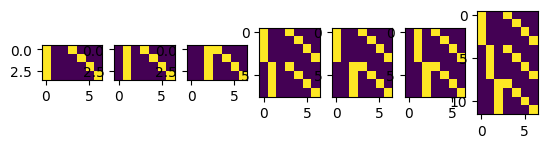

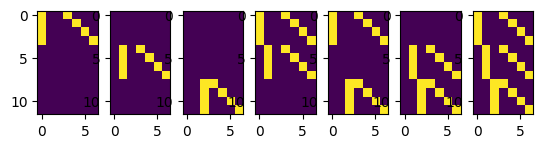

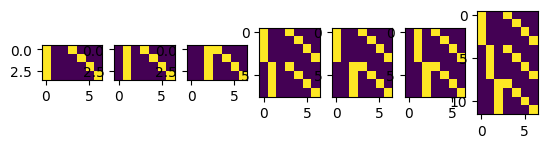

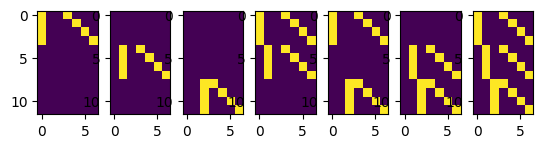

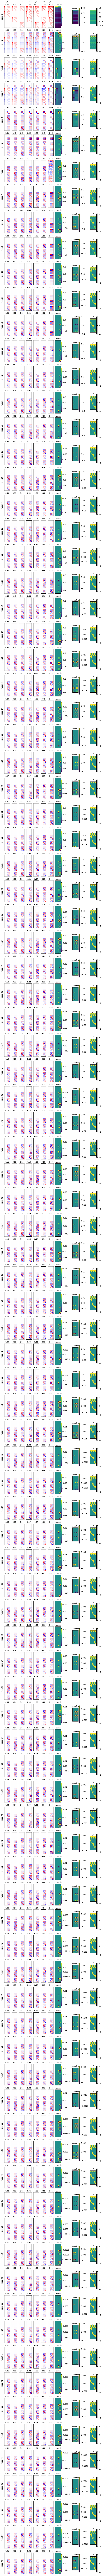

In [ ]:
_, _, winners = du.race_reduction(feature_tensor, label_tensor, context_tensor, ctx_mode='all', n_iter=100, one_plot=True);
# f.savefig('a.png')

MovieWriter mencoder unavailable; using Pillow instead.


tensor([-0.4364, -0.4364, -0.4364, -0.3273, -0.3273, -0.3273, -0.3273])
both
tensor([ 1.2471e-09,  1.8666e-07, -8.5866e-08,  5.0000e-01,  5.0000e-01,
        -5.0000e-01, -5.0000e-01])
x
tensor([ 1.4902e-08, -7.0711e-01,  7.0711e-01, -7.7987e-08,  1.1424e-07,
        -2.0174e-07, -2.6323e-08])
c
tensor([-8.1650e-01,  4.0825e-01,  4.0825e-01, -1.1106e-07, -1.0824e-07,
        -8.6066e-08, -9.6626e-08])
c
tensor([-1.5165e-08,  0.0000e+00, -4.2839e-08, -5.9823e-01,  5.9823e-01,
        -3.7699e-01,  3.7699e-01])
x
tensor([-1.3397e-08, -1.1921e-07, -9.3560e-08,  3.7699e-01, -3.7699e-01,
        -5.9823e-01,  5.9823e-01])
x
tensor([-0.5000, -0.5000,  0.5000,  0.5000])
both
tensor([-0.5000, -0.5000,  0.5000,  0.5000])
both
tensor([-0.5000, -0.5000,  0.5000,  0.5000])
both
tensor([-0.5000, -0.5000,  0.5000,  0.5000])
both
tensor([-0.5000, -0.5000,  0.5000,  0.5000])
both
tensor([-0.5000, -0.5000,  0.5000,  0.5000])
both
tensor([ 0.5000,  0.5000, -0.5000, -0.5000])
both
tensor([ 0.5000,  0.500

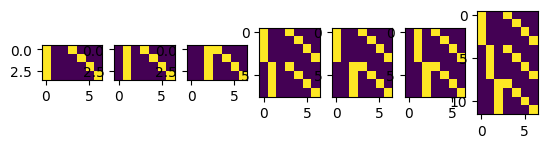

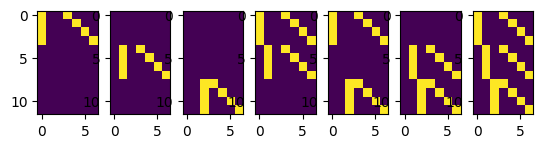

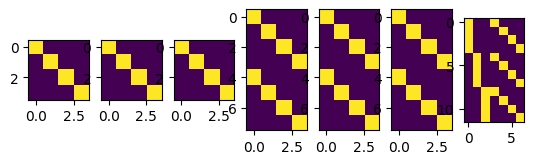

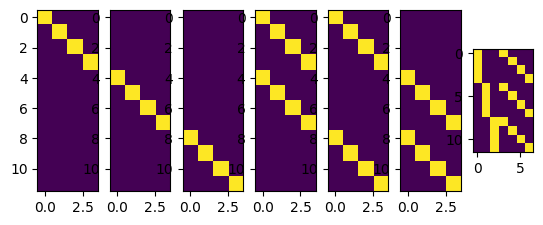

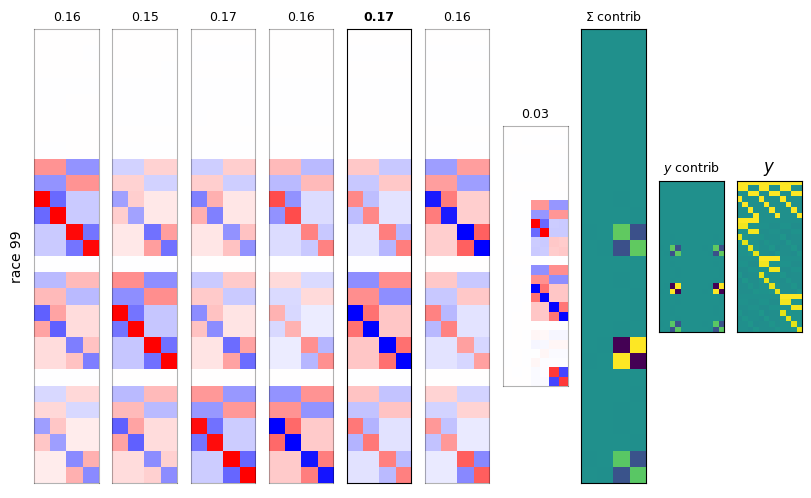

In [21]:
if plot_specs['anim']:
    du.race_reduction_anim(feature_tensor, label_tensor, context_tensor, ctx_mode='first', n_iter=100, mult=1) #, show=False)

# Analytics

N.B. Haven't got working properly yet

tensor([2.0000e+00, 2.0000e+00, 1.3229e+00, 1.3229e+00, 1.1547e+00, 1.1547e+00,
        1.0001e-14])
tensor([[2., 0., 0., 0.],
        [0., 2., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 2.]])
Sx: torch.Size([4])
torch.Size([20000, 28, 4])
torch.Size([12, 4])
torch.Size([4])
torch.Size([20000, 28, 4])
torch.Size([12, 4])


(0.0, 5000.0)

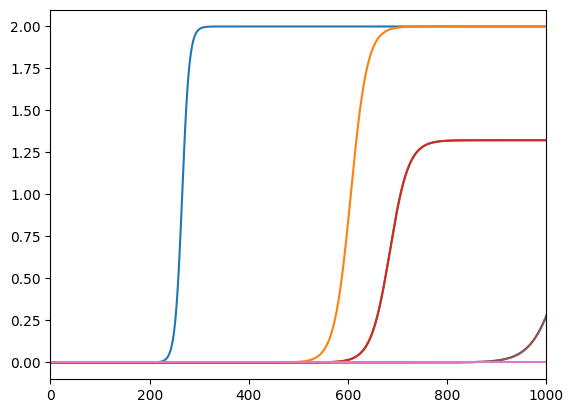

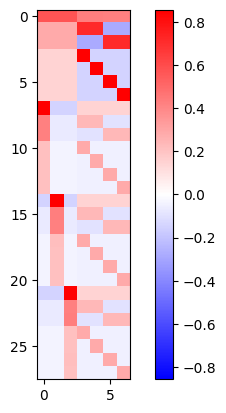

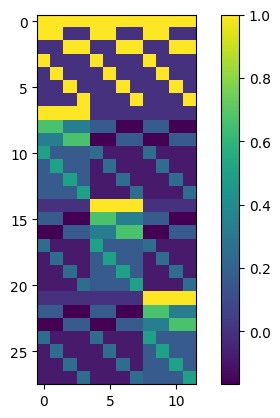

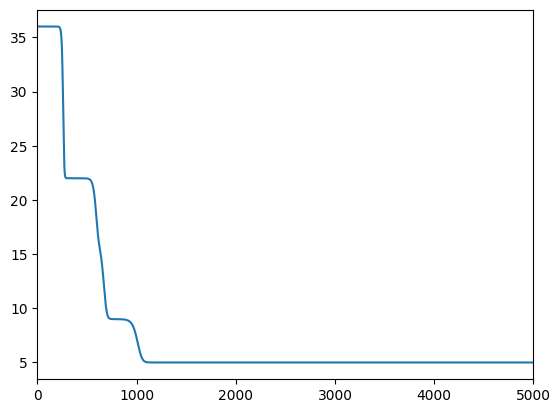

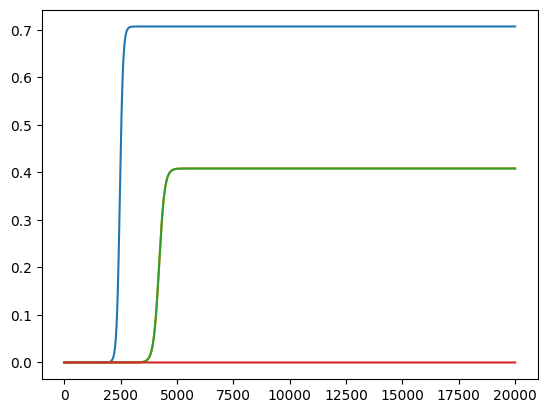

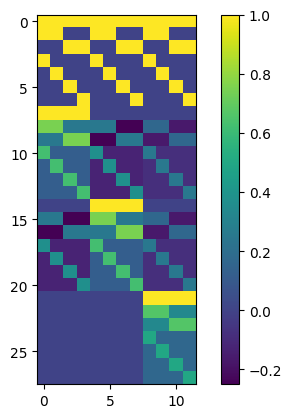

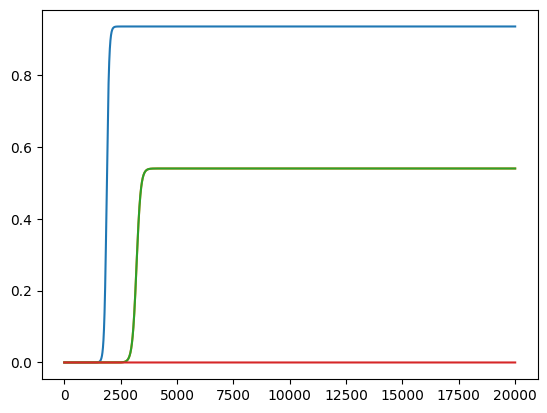

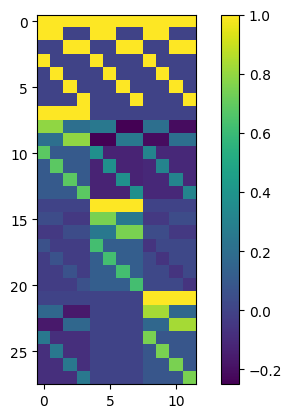

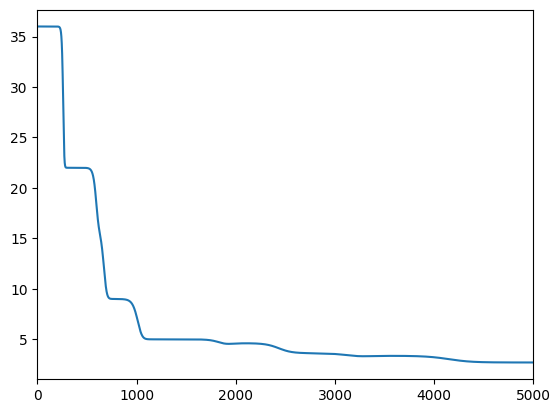

In [22]:
tol = 1e-6
t = torch.arange(n_epochs, dtype=torch.float)
tau = 1/lr

x = torch.cat([context_tensor, label_tensor], dim=1)
sigma_yx = feature_tensor.T @ x
sigma_x = x.T @ x

U, S, V = torch.svd(sigma_yx)
_, Sx, _ = torch.svd(sigma_x)

Sx_ = torch.Tensor([7., 3., 4., 4., 3., 3., 0.1])
# print(V.T)
# plt.figure()
# im=plt.imshow(abs(V.T.numpy()) > tol)
# plt.colorbar(im)

# V_thresh = torch.abs(V.T) > tol
# V_c_x = torch.cat([torch.any(V_thresh[:,:dim_context],axis=1,keepdim=True), 
#                    torch.any(V_thresh[:,dim_context:],axis=1,keepdim=True)], axis=1)
# V_c = torch.where(V_c_x[:,0])
# V_x = torch.where(V_c_x[:,1])

# plt.figure()
# plt.imshow(V_c_x.numpy())

S_0 = 1e-15 * torch.ones_like(S)

power = 2 * torch.outer(t,S) / tau

exponent = torch.exp((2 * torch.outer(t, S) / tau) - power)
addition = torch.broadcast_to(S/S_0 - 1, (n_epochs, len(S))) * torch.exp(-power)
denom = exponent + addition
num = (S/Sx_) * exponent
alphas = num / denom

plt.figure()
for a in alphas.T:
    plt.plot(a.numpy())
    
plt.xlim([0,1000])

alphas_diag = torch.diag_embed(alphas)

w = U @ alphas_diag @ V.T

print(alphas[-1,:])

plt.figure()
lim = np.maximum(np.abs(np.min(w.numpy())), np.max(w.numpy()))
im=plt.imshow(w[-1,:,:], cmap='bwr', vmin=-lim, vmax=lim)
plt.colorbar(im)

y = w @ x.T
plt.figure()
im=plt.imshow(y[-1,:,:].numpy())
plt.colorbar(im)

err = y - torch.unsqueeze(feature_tensor.T, dim=0)
mse = 0.5 * torch.einsum('ijk,ijk->i', err, err)
plt.figure()
plt.plot(mse.numpy())
plt.xlim([0,5000])

# err = y - torch.unsqueeze(feature_tensor.T, dim=0)

# loss = 0.5 * criterion(y.T, feature_tensor)


x = torch.cat([label_tensor[:8,:], torch.zeros((4,4))])
sigma_yx = (feature_tensor.T - y[-1,:,:]) @ x
sigma_x = x.T @ x
print(sigma_x)
U, S, V = torch.svd(sigma_yx)
_, Sx, _ = torch.svd(sigma_x)
print('Sx:', S.shape)
S_0 = 1e-15 * torch.ones_like(S)

power = 2 * torch.outer(t,S) / tau
exponent = torch.exp((2 * torch.outer(t, S) / tau) - power)
addition = torch.broadcast_to(S/S_0 - 1, (n_epochs, S.shape[0])) * torch.exp(-power)
denom = exponent + addition
num = (S/Sx) * exponent
alphas = num / denom

plt.figure()
for a in alphas.T:
    plt.plot(a.numpy())
    
alphas_diag = torch.diag_embed(alphas)

w = U @ alphas_diag @ V.T
print(w.shape)
print(x.shape)
y += w @ x.T

plt.figure()
im=plt.imshow(y[-1,:,:].numpy())
plt.colorbar(im)

x = torch.cat([label_tensor[:4,:], torch.zeros((4,4)), label_tensor[8:,:]])
sigma_yx = (feature_tensor.T - y[-1,:,:]) @ x
sigma_x = x.T @ x
U, S, V = torch.svd(sigma_yx)
_, Sx, _ = torch.svd(sigma_x)
print(S.shape)
S_0 = 1e-15 * torch.ones_like(S)

power = 2 * torch.outer(t,S) / tau
exponent = torch.exp((2 * torch.outer(t, S) / tau) - power)
addition = torch.broadcast_to(S/S_0 - 1, (n_epochs, S.shape[0])) * torch.exp(-power)
denom = exponent + addition
num = (S/Sx) * exponent
alphas = num / denom

plt.figure()
for a in alphas.T:
    plt.plot(a.numpy())
    
alphas_diag = torch.diag_embed(alphas)

w = U @ alphas_diag @ V.T
print(w.shape)
print(x.shape)
y += w @ x.T

plt.figure()
im=plt.imshow(y[-1,:,:].numpy())
plt.colorbar(im)

err = y - torch.unsqueeze(feature_tensor.T, dim=0)
mse = 0.5 * torch.einsum('ijk,ijk->i', err, err)
plt.figure()
plt.plot(mse.numpy())
plt.xlim([0,5000])

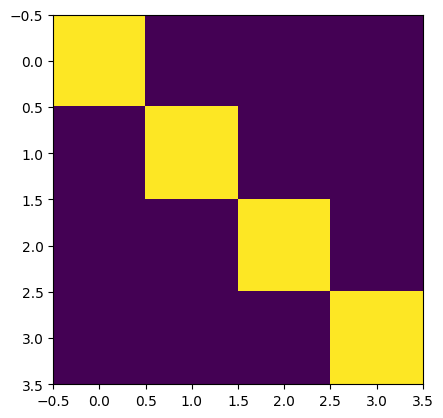

In [23]:
U, S, V = np.linalg.svd(sigma_yx.numpy())
_, Sx, _ = np.linalg.svd(sigma_x.numpy())

plt.figure()
plt.imshow(sigma_x)

## Comparison of different gating architectures

In [24]:
# Training
gamma = 1e-4
lr = .001 if gamma == 1e-4 else 0.005 # Learning rate
n_epochs = 15000

In [25]:
from ReluNNet import ReluNNet
dim_hidden = 3*4*7*2
dim_output = feature_tensor.shape[1]
dims_relu = (dim_input_relu, dim_hidden, dim_output)
relunn_model = ReluNNet(dims=dims_relu, n_context=dim_context, gateable_layers=gateable_layers, final_relu=False)

7


In [26]:
# Training
SEED = 2022
mu.set_seed(seed=SEED)

mu.initializer_(relunn_model, gamma)

losses_relu, preds_relu, rsms_relu, _, _, _ = train(relunn_model,
                  label_tensor,
                  feature_tensor,
                  context_tensor,
                  n_epochs=n_epochs,
                  lr=lr,
                  hold_out_i=held_out,
                  corr=False,
                  rsm_interval=n_epochs//100,
                  relu=True)

[100, 8, 16, 22, 6, 13, 3]
[124, 9, 8, 13, 3, 7, 4]
[153, 1, 2, 6, 1, 4, 1]
[159, 2, 1, 2, 1, 2, 1]
[162, 2, 1, 1, 0, 1, 1]
[165, 1, 0, 0, 0, 1, 1]
[166, 0, 0, 0, 0, 1, 1]
[166, 0, 1, 0, 0, 1, 0]
[166, 1, 1, 0, 0, 0, 0]
[168, 0, 0, 0, 0, 0, 0]
[168, 0, 0, 0, 0, 0, 0]
[168, 0, 0, 0, 0, 0, 0]
[160, 2, 1, 3, 0, 0, 2]
[157, 4, 1, 3, 0, 1, 2]
[153, 4, 2, 3, 1, 2, 3]
[154, 4, 1, 4, 1, 2, 2]
[160, 2, 3, 3, 0, 0, 0]
[160, 2, 3, 3, 0, 0, 0]
[160, 2, 3, 3, 0, 0, 0]
[159, 3, 3, 3, 0, 0, 0]
[159, 3, 3, 3, 0, 0, 0]
[159, 3, 3, 3, 0, 0, 0]
[156, 4, 3, 4, 0, 0, 1]
[154, 5, 3, 5, 0, 0, 1]
[154, 5, 3, 5, 0, 0, 1]
[152, 5, 4, 6, 0, 0, 1]
[150, 5, 5, 7, 0, 0, 1]
[147, 5, 5, 10, 0, 0, 1]
[146, 5, 5, 11, 0, 0, 1]
[144, 6, 5, 12, 0, 0, 1]
[143, 6, 6, 12, 0, 0, 1]
[142, 7, 6, 12, 0, 0, 1]
[139, 8, 8, 12, 0, 0, 1]
[138, 8, 9, 12, 0, 0, 1]
[137, 8, 10, 12, 0, 0, 1]
[133, 8, 12, 14, 0, 0, 1]
[131, 10, 12, 15, 0, 0, 0]
[130, 10, 12, 16, 0, 0, 0]
[129, 11, 12, 16, 0, 0, 0]
[127, 12, 12, 17, 0, 0, 0]
[126, 12, 12,

In [27]:
all_pathways = []
all_mappings = []

if dim_context != 3:
    raise ValueError()

# all_pathways.append((1,1,1))
# all_mappings.append([[0],[0],[0]])
    
all_pathways.append((1,3,1))
all_mappings.append([[0],[1],[2]])

all_pathways.append((1,4,1))
all_mappings.append([[0,1],[0,2],[0,3]])

all_pathways.append((1,4,1))
all_mappings.append([[0,1,2],[0,1,3],[0,2,3]])

all_pathways.append((1,7,1))
all_mappings.append([[0,1,2,4],[0,1,3,5],[0,2,3,6]])

models = []
dims_gated = (dim_input, dim_hidden, dim_output)

for p, m in zip(all_pathways, all_mappings):
    print('p: ', p, '\tm: ', m)
    model_ = GLNNet(dims=dims_gated, pathways=p, context_to_pathway_map=m, 
                    n_context=dim_context, context_in_input=True, ctx_to_all=False)
    model_
    models.append(model_)

p:  (1, 3, 1) 	m:  [[0], [1], [2]]
p:  (1, 4, 1) 	m:  [[0, 1], [0, 2], [0, 3]]
p:  (1, 4, 1) 	m:  [[0, 1, 2], [0, 1, 3], [0, 2, 3]]
p:  (1, 7, 1) 	m:  [[0, 1, 2, 4], [0, 1, 3, 5], [0, 2, 3, 6]]


In [28]:
losses_all = []
for model_ in models:
    SEED = 2022
    mu.set_seed(seed=SEED)

    mu.initializer_(model_, gamma)

    losses_, _, _, _, _, _ = train(model_,
                                  label_tensor_,
                                  feature_tensor,
                                  context_tensor,
                                  n_epochs=n_epochs,
                                  lr=lr,
                                  hold_out_i=held_out,
                                  corr=False,
                                  rsm_interval=n_epochs//100)
    
    losses_all.append(losses_)

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking context input to non-shared pathways
masking co

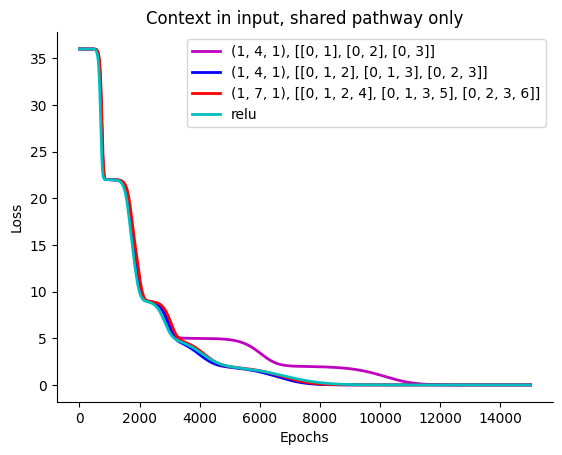

In [29]:
plt.figure()
# colors = plt.cm.cool(np.linspace(0, 1, len(losses_all)+1))
colors = ['y', 'm', 'b', 'r', 'o', 'c']

for i, (l, p, m) in enumerate(zip(losses_all, all_pathways, all_mappings)):
    if i != 0:
        plt.plot(l, c=colors[i], label=str(p) + ', ' + str(m), linewidth=2)
    
plt.plot(losses_relu, c=colors[-1], label='relu', linewidth=2)
plt.legend()
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
# plt.xlim([500,5000])
plt.title('Context in input, shared pathway only')
plt.show()

In [30]:
models = []
for p, m in zip(all_pathways, all_mappings):
    print('p: ', p, '\tm: ', m)
    model_ = GLNNet(dims=dims_gated, pathways=p, context_to_pathway_map=m, 
                    n_context=dim_context, context_in_input=True, ctx_to_all=True)
    model_
    models.append(model_)
    
losses_all = []
for model_ in models:
    SEED = 2022
    mu.set_seed(seed=SEED)

    mu.initializer_(model_, gamma)

    losses_, _, _, _, _, _ = train(model_,
                                  label_tensor_,
                                  feature_tensor,
                                  context_tensor,
                                  n_epochs=n_epochs,
                                  lr=lr,
                                  hold_out_i=held_out,
                                  corr=False,
                                  rsm_interval=n_epochs//100)
    
    losses_all.append(losses_)

p:  (1, 3, 1) 	m:  [[0], [1], [2]]
p:  (1, 4, 1) 	m:  [[0, 1], [0, 2], [0, 3]]
p:  (1, 4, 1) 	m:  [[0, 1, 2], [0, 1, 3], [0, 2, 3]]
p:  (1, 7, 1) 	m:  [[0, 1, 2, 4], [0, 1, 3, 5], [0, 2, 3, 6]]


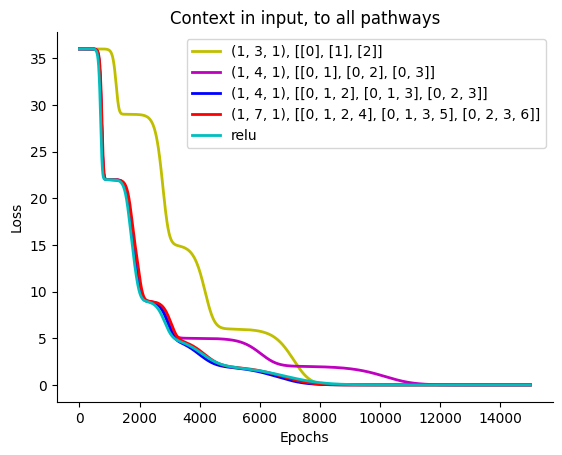

In [31]:
plt.figure()
# colors = plt.cm.cool(np.linspace(0, 1, len(losses_all)+1))
colors = ['y', 'm', 'b', 'r', 'o', 'c']

for i, (l, p, m) in enumerate(zip(losses_all, all_pathways, all_mappings)):
    plt.plot(l, c=colors[i], label=str(p) + ', ' + str(m), linewidth=2)
    
plt.plot(losses_relu, c=colors[-1], label='relu', linewidth=2)
plt.legend()
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
# plt.xlim([500,5000])
plt.title('Context in input, to all pathways')
plt.show()

In [32]:
models = []
for p, m in zip(all_pathways, all_mappings):
    print('p: ', p, '\tm: ', m)
    model_ = GLNNet(dims=dims_gated, pathways=p, context_to_pathway_map=m, 
                    n_context=dim_context, context_in_input=False, ctx_to_all=False)
    model_
    models.append(model_)
    
losses_all = []
for model_ in models:
    SEED = 2022
    mu.set_seed(seed=SEED)

    mu.initializer_(model_, gamma)

    losses_, _, _, _, _, _ = train(model_,
                                  label_tensor_,
                                  feature_tensor,
                                  context_tensor,
                                  n_epochs=n_epochs,
                                  lr=lr,
                                  hold_out_i=held_out,
                                  corr=False,
                                  rsm_interval=n_epochs//100)
    
    losses_all.append(losses_)

p:  (1, 3, 1) 	m:  [[0], [1], [2]]
p:  (1, 4, 1) 	m:  [[0, 1], [0, 2], [0, 3]]
p:  (1, 4, 1) 	m:  [[0, 1, 2], [0, 1, 3], [0, 2, 3]]
p:  (1, 7, 1) 	m:  [[0, 1, 2, 4], [0, 1, 3, 5], [0, 2, 3, 6]]


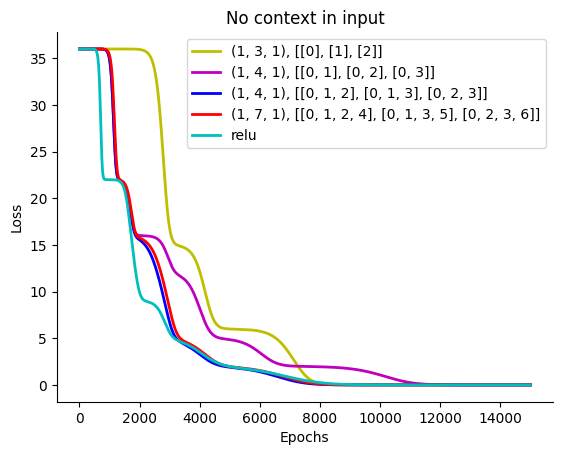

In [33]:
plt.figure()
# colors = plt.cm.cool(np.linspace(0, 1, len(losses_all)+1))
colors = ['y', 'm', 'b', 'r', 'o', 'c']

for i, (l, p, m) in enumerate(zip(losses_all, all_pathways, all_mappings)):
    plt.plot(l, c=colors[i], label=str(p) + ', ' + str(m), linewidth=2)
    
plt.plot(losses_relu, c=colors[-1], label='relu', linewidth=2)
plt.legend()
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
# plt.xlim([500,5000])
plt.title('No context in input')
plt.show()